# Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

In [7]:
#Creating a path
path = r'/users/divyaneopaney/Downloads/Chocolate Bar Analysis'
path

'/users/divyaneopaney/Downloads/Chocolate Bar Analysis'

In [8]:
#Importing the dataframe
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'Cleaned_ChocolateBarRating.csv'))
df.head(10)

,Company (Maker-if known),BarName,REF,ReviewDate,CocoaPercent,Location,Rating,BeanType,BroadOrigin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Unknown,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,Unknown,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,Unknown,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,Unknown,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,Unknown,Peru
5,A. Morin,Carenero,1315,2014,70.0,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70.0,France,3.50,Unknown,Cuba
7,A. Morin,Sur del Lago,1315,2014,70.0,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70.0,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70.0,France,4.00,Unknown,Peru


In [9]:
#Rechecking Table size
df.shape

(1795, 9)

In [10]:
#Rechecking Column & Data Types
df.dtypes

Company  (Maker-if known)     object
BarName                       object
REF                            int64
ReviewDate                     int64
CocoaPercent                 float64
Location                      object
Rating                       float64
BeanType                      object
BroadOrigin                   object
dtype: object

In [11]:
# 1. Standardizing all column names by replacing \xa0 with a regular space and removing any leading or trailing whitespace.
df.columns = [col.replace('\xa0', ' ').strip() for col in df.columns]
# 2. Now renamaing the company/cleaned header
df.rename(columns={'Company  (Maker-if known)': 'Company'}, inplace=True)
df.columns.tolist()

['Company',
 'BarName',
 'REF',
 'ReviewDate',
 'CocoaPercent',
 'Location',
 'Rating',
 'BeanType',
 'BroadOrigin']

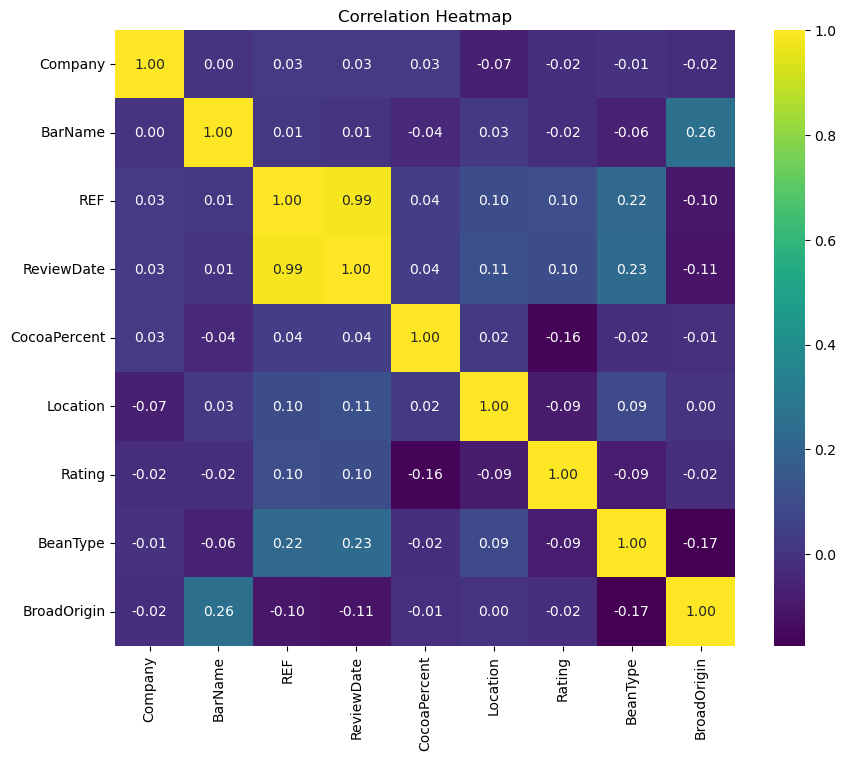

In [12]:
#Heatmap
encoded = df.copy()
# Encode all object or categorical columns automatically
for col in encoded.select_dtypes(include=['object', 'category']).columns:
    encoded[col] = encoded[col].astype('category').cat.codes
# Now compute correlation and plot
plt.figure(figsize=(10,8))
corr = encoded.corr()
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

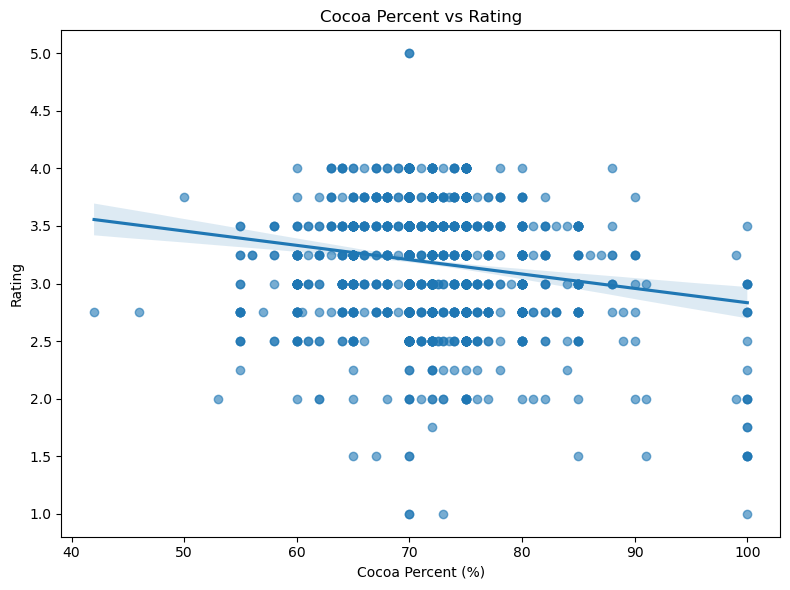

In [13]:
#Creating a scatterplot 
#Answering a Key Question: Is there a relationship between cocoa percentage and rating?
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='CocoaPercent', y='Rating', scatter_kws={'alpha':0.6})
plt.title('Cocoa Percent vs Rating')
plt.xlabel('Cocoa Percent (%)')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

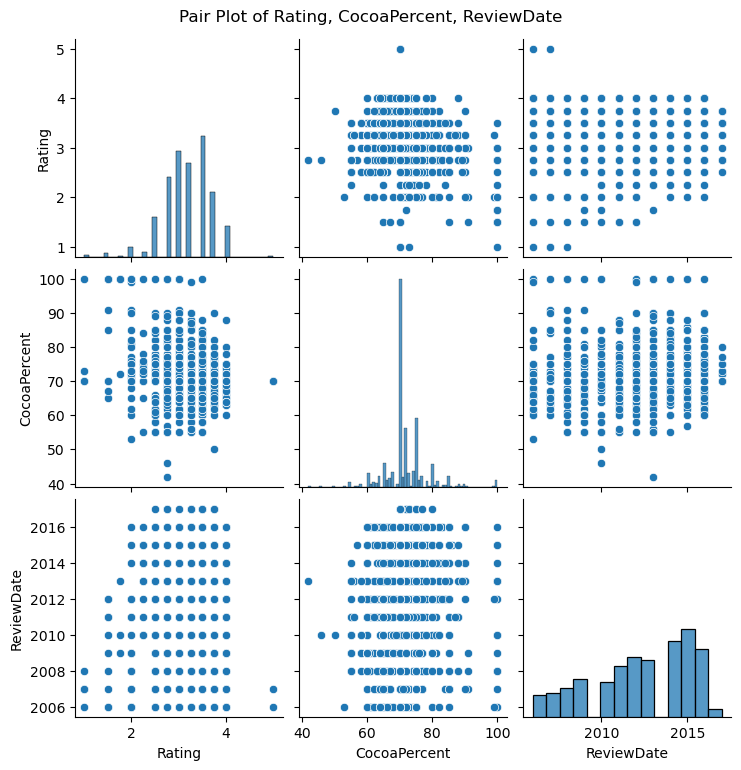

In [14]:
# Pair Plotting: Rating, CocoaPercent, ReviewDate
sns.pairplot(df[['Rating', 'CocoaPercent', 'ReviewDate']])
plt.suptitle('Pair Plot of Rating, CocoaPercent, ReviewDate', y=1.02)
plt.show()

/var/folders/wf/s0crnzgd66b7pdj9_7_b6mpw0000gn/T/ipykernel_42236/1796012243.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['BeanType'].isin(top_beans)],


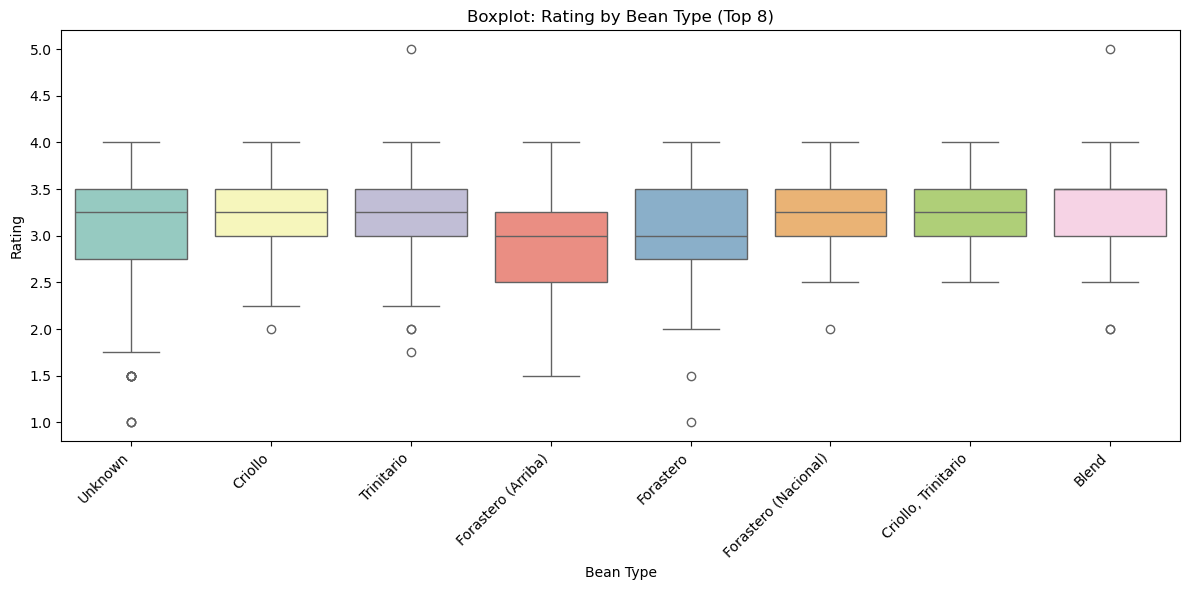

In [15]:
# Categorical Plot: Rating by BeanType (top 8) 
# Answering Key question: Are specific bean types (e.g., Criollo, Forastero) associated with higher quality?
plt.figure(figsize=(12, 6))
top_beans = df['BeanType'].value_counts().nlargest(8).index
sns.boxplot(data=df[df['BeanType'].isin(top_beans)],
            x='BeanType', y='Rating',
            palette='Set3')  # adds a pleasant color palette
plt.xticks(rotation=45, ha='right')  # better label alignment
plt.title('Boxplot: Rating by Bean Type (Top 8)')
plt.xlabel('Bean Type')
plt.ylabel('Rating')
plt.tight_layout()  # prevent clipping of labels/title
plt.show()

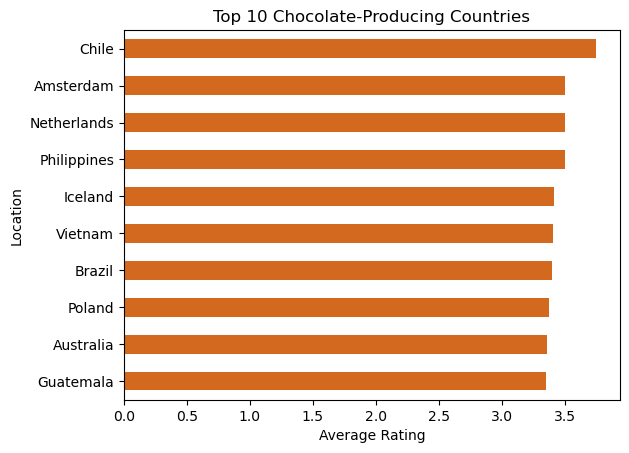

In [16]:
#Answering a key question : 'Which countries produce the highest-rated chocolate bars?' 
# Calculating the average rating by country
avg_rating = df.groupby('Location')['Rating'].mean().sort_values(ascending=False)
# Plot the top 10
avg_rating.head(10).plot(kind='barh', color='chocolate')
plt.xlabel('Average Rating')
plt.title('Top 10 Chocolate-Producing Countries')
plt.gca().invert_yaxis()  # Show highest at the top
plt.show()